<h1 style="text-align:center;">Cameron Hicks - Capstone Project Two</h1>
<h1 style="text-align:center;">Hotel Reservation Cancellation Risk Model</h1>
<h2 style="text-align:center;">Modeling</h2>

## Summary

Hotel Reservation Cancellations have a significant impact on a hotels overall revenue and operation strategies. In this capstone have developed a machine learning based cancellation risk model that can assist these hotels in many aspects from determining inventory levels for potential oversells to determining staffing levels. This model will provide the hotel leadership with the actionable insights that will help to determine and support business decisions that will maximize overall profit for the property.

In this notebook, I developed and compared 4 different models, Linear Regression, Gradient Boosting, Decision Tree, and Random Forrest, to select the model that will perform the best. In my comparision I fit each of the models to the test data from two hotels in Portugal, then compared their Accuracy, Precision, F1, and ROC-AUC scores. In conclusion, the Random Forest Model performed the strongest on all metrics and was the obvious choice for our final model. 

#### Data Sources

1. Hotel Booking Demand Dataset - https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data
2. Open-Meteo Weather API - https://open-meteo.com/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    f1_score,
    auc,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay,
    classification_report,
    ConfusionMatrixDisplay
)

### Load Data

In the previous step, preprocessing, I saved a csv file with the encoded and scaled data. Loading that data here for modeling.

In [5]:
df = pd.read_csv('../Data/hotel_weather_preprocessed_df.csv')

In the next few steps I will check the data to ensure it has saved and loaded properly.

In [6]:
df.shape

(87396, 1971)

In [7]:
df.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,weather_description_Dense drizzle,weather_description_Heavy rain,weather_description_Light drizzle,weather_description_Mainly clear,weather_description_Moderate drizzle,weather_description_Moderate rain,weather_description_Overcast,weather_description_Partly cloudy,weather_description_Slight rain,is_canceled
0,3.045939,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,False,0
1,7.636196,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,False,0
2,-0.847064,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,False,0
3,-0.777338,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,False,0
4,-0.765717,-1.764027,0.011822,-1.676896,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,False,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Columns: 1971 entries, lead_time to is_canceled
dtypes: bool(1947), float64(23), int64(1)
memory usage: 178.3 MB


Now that I have my data loaded and checked, I need to re-create the X and y variables that I created in the end of the preprocessing step. The X variable needs to remove the target so the model can use the parameters to make predictions, and the y variable will be the target to train and test the model on.

In [9]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

Then with the X and y variable created I will create our training and test variables using train_test_split. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model 1 - Logistic Regression

In [11]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12675
           1       0.76      0.55      0.64      4805

    accuracy                           0.83     17480
   macro avg       0.81      0.74      0.76     17480
weighted avg       0.82      0.83      0.82     17480

ROC-AUC: 0.8612509569461463


In [13]:
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))

Logistic Regression Performance
Accuracy: 0.8295194508009154
Precision: 0.7648766328011611
Recall: 0.5483870967741935
F1: 0.6387878787878788


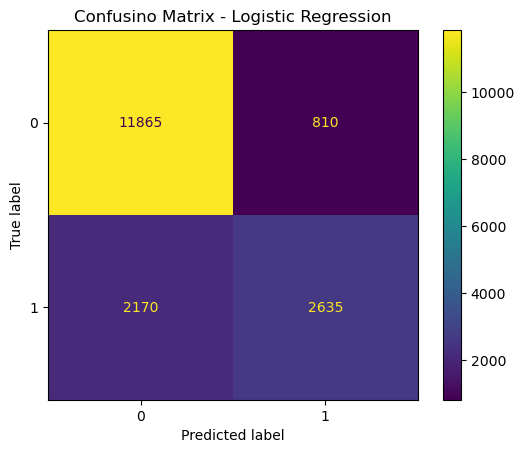

In [14]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Confusino Matrix - Logistic Regression")
plt.show()

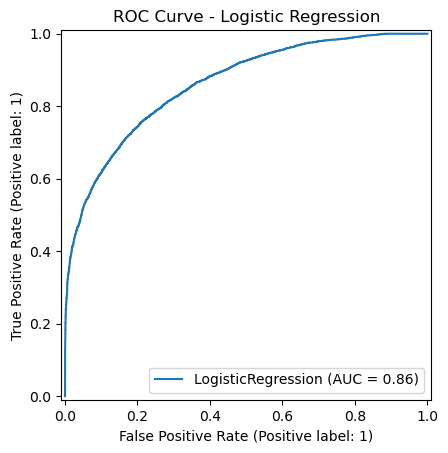

In [15]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

### Cross-Validation

In [16]:
param_grid = {'C': [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1', n_jobs=1)
grid_lr.fit(X_train, y_train)

best_log_reg = grid_lr.best_estimator_

## Model 2 - Gradient Boosting Classifier

In [17]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12675
           1       0.77      0.57      0.65      4805

    accuracy                           0.83     17480
   macro avg       0.81      0.75      0.77     17480
weighted avg       0.83      0.83      0.82     17480

ROC-AUC: 0.8929182085557656


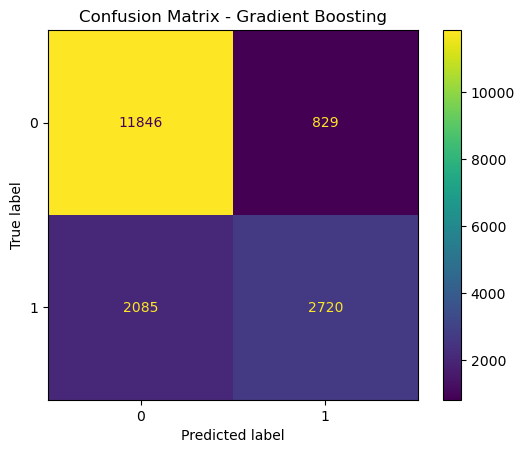

In [19]:
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

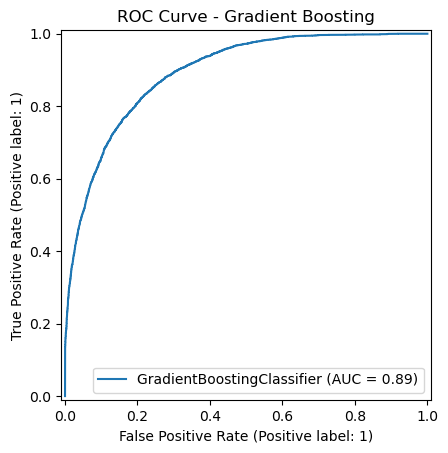

In [20]:
RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

## Model 3 - Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     12675
           1       0.76      0.72      0.74      4805

    accuracy                           0.86     17480
   macro avg       0.83      0.82      0.82     17480
weighted avg       0.86      0.86      0.86     17480

ROC-AUC: 0.8174741137088052


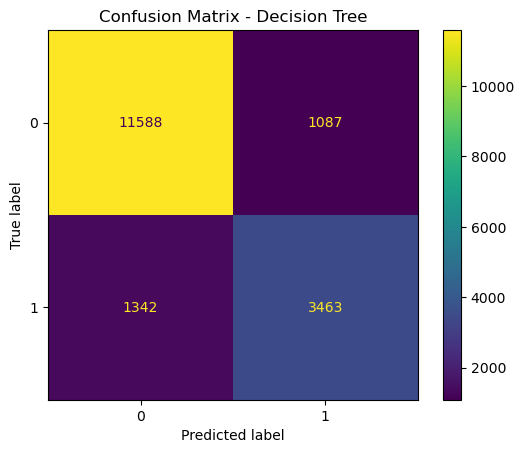

In [23]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

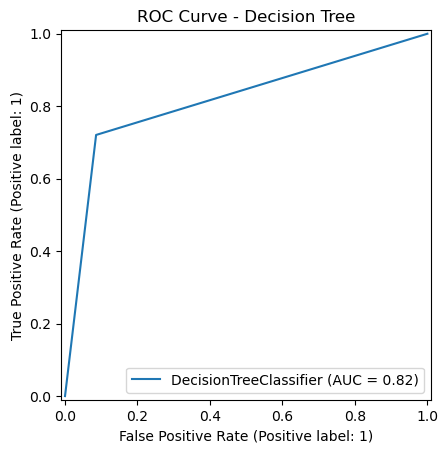

In [24]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

In [25]:
dt_param_grid = {'max_depth': [5, 10, 20, None],
                 'min_samples_split': [2, 10, 50],
                 'min_samples_leaf': [1, 5, 10]}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1', n_jobs=1)

dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 50]},
             scoring='f1')

In [26]:
best_dt = dt_grid.best_estimator_

y_pred_dt_best = best_dt.predict(X_test)
y_prob_dt_best = best_dt.predict_proba(X_test)[:,1]

print("Best Parameters:", dt_grid.best_params_)
print(classification_report(y_test, y_pred_dt_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt_best))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     12675
           1       0.76      0.72      0.74      4805

    accuracy                           0.86     17480
   macro avg       0.83      0.82      0.82     17480
weighted avg       0.86      0.86      0.86     17480

ROC-AUC: 0.8174741137088052


## Model 4 - Random Forrest

In [27]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [28]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12675
           1       0.94      0.68      0.79      4805

    accuracy                           0.90     17480
   macro avg       0.92      0.83      0.86     17480
weighted avg       0.90      0.90      0.89     17480

ROC-AUC: 0.9665612045309476


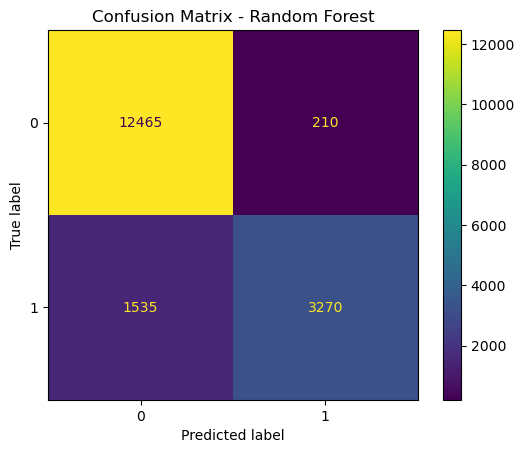

In [29]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

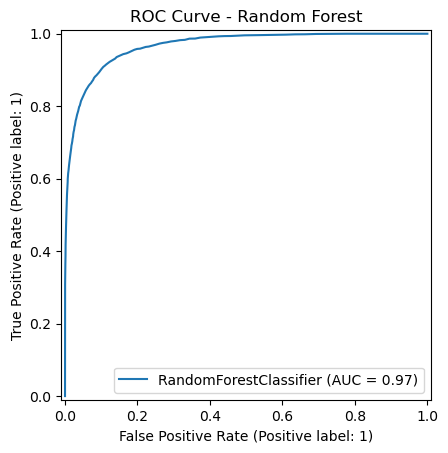

In [30]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

## Comparing Models

In [31]:
model_results = pd.DataFrame({
    "Model": 
        ["Logistic Regression", "Gradient Boosting Classifier", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr), 
        accuracy_score(y_test, y_pred_gb), 
        accuracy_score(y_test, y_pred_dt), 
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr), 
        precision_score(y_test, y_pred_gb), 
        precision_score(y_test, y_pred_dt), 
        precision_score(y_test, y_pred_rf)
    ],
    "F1": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_gb),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

model_results

,Model,Accuracy,Precision,F1,ROC-AUC
0,Logistic Regression,0.829519,0.764877,0.638788,0.861251
1,Gradient Boosting Classifier,0.833295,0.766413,0.651185,0.892918
2,Decision Tree,0.861041,0.761099,0.740353,0.817474
3,Random Forest,0.900172,0.939655,0.789378,0.966561


<function matplotlib.pyplot.show(close=None, block=None)>

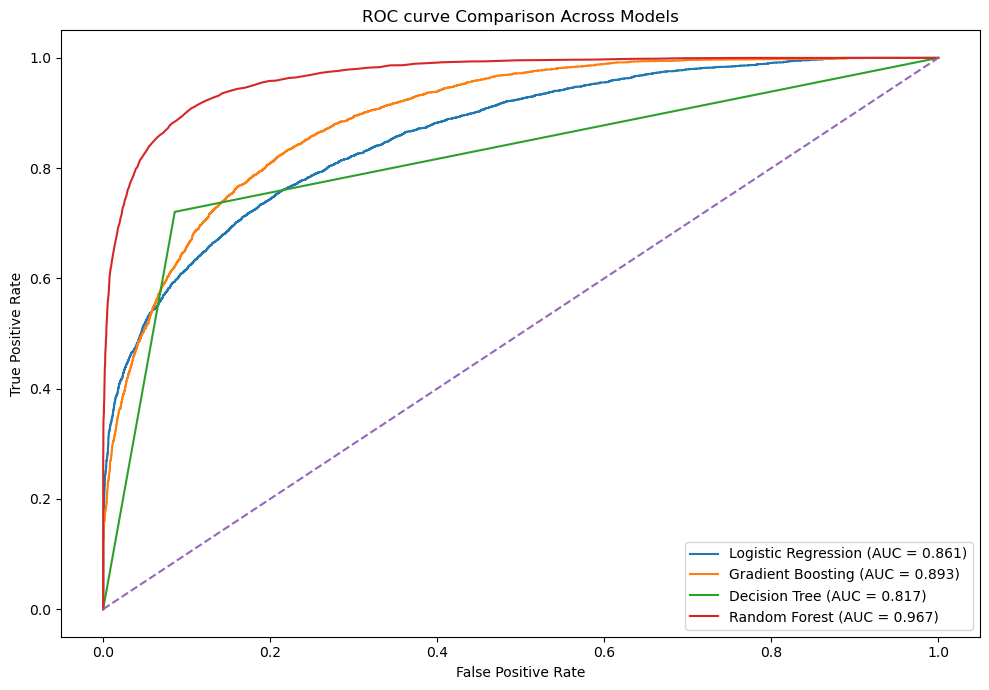

In [32]:
models = {
    "Logistic Regression": log_reg,
    "Gradient Boosting": gb,
    "Decision Tree": dt,
    "Random Forest": rf
}

plt.figure(figsize = (10,7))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.savefig('ROCcurveComp.png', bbox_inches='tight', dpi=100)
plt.show

### Model Analysis & Conclusion

Comparing the Logistic Regression, Gradient Boosting Classifier, Decision Tree, and Random Forest Models on the metrics of accurary, precision, F1-score, and ROC-AUC, we can see that the Random Forest model performed the strongest on all metrics. The strong and consistent performance the Random Forest Model showed on the training and test data makes it the clear choice for our Hotel Cancellation Prediction Model. 

## Final Model Selection and Deployment Readiness

In [33]:
Reservation_Cancellation_Prediction_Model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

Reservation_Cancellation_Prediction_Model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [34]:
y_test_proba = Reservation_Cancellation_Prediction_Model.predict_proba(X_test)[:, 1]
final_roc_auc = roc_auc_score(y_test, y_test_proba)

final_roc_auc

0.9665612045309476

In [35]:
new_reservations = X_test.sample(5, random_state=42)

new_reservations['cancellation_probability'] = Reservation_Cancellation_Prediction_Model.predict_proba(
    new_reservations
)[:, 1]

new_reservations[['cancellation_probability']]

,cancellation_probability
30535,0.070
53492,0.030
81852,0.860
16725,0.025
37521,0.265


### Final Model Explanation

The final model is designed to take in the parameters from a new reservation and return the probability of cancellation. It is recommended that the hotel applies the finalized Hotel Cancellation Prediction model to all new reservations to generate teh probability of cancellation. The hotel Revenue Management team can use the probabilities to determine the number of rooms that can be oversold to achieve a perfect sell out even with cancellations.

### Model Metrics

In [36]:
y_pred = Reservation_Cancellation_Prediction_Model.predict(X_test)
y_pred_proba = Reservation_Cancellation_Prediction_Model.predict_proba(X_test)[:, 1]

In [37]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}

metrics

{'Accuracy': 0.9001716247139588,
 'Precision': 0.9396551724137931,
 'Recall': 0.6805411030176899,
 'F1 Score': 0.7893783946891973,
 'ROC-AUC': 0.9665612045309476}

In [39]:
hyperparameters = Reservation_Cancellation_Prediction_Model.get_params()

In [40]:
model_metrics = {
    "Model Name": "Hotel Reservation Cancellation Predictor",
    "Model Type": "Random Forest Classifier",
    "Target Variable": "is_canceled",
    "Train/Test Split": "80/20",
    "Random State": 42,
    "Number of Features": X_train.shape[1],
    "Accuracy": metrics["Accuracy"],
    "Precision": metrics["Precision"],
    "Recall": metrics["Recall"],
    "F1 Score": metrics["F1 Score"],
    "ROC-AUC": metrics["ROC-AUC"],
    "n_estimators": hyperparameters["n_estimators"],
    "max_depth": hyperparameters["max_depth"],
    "min_samples_split": hyperparameters["min_samples_split"],
    "min_samples_leaf": hyperparameters["min_samples_leaf"],
    "max_features": hyperparameters["max_features"]
}

In [41]:
model_metrics_df = pd.DataFrame([model_metrics])
model_metrics_df

,Model Name,Model Type,Target Variable,Train/Test Split,Random State,Number of Features,Accuracy,Precision,Recall,F1 Score,ROC-AUC,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features
0,Hotel Reservation Cancellation Predictor,Random Forest Classifier,is_canceled,80/20,42,1970,0.900172,0.939655,0.680541,0.789378,0.966561,200,None,2,1,sqrt


In [42]:
model_metrics_df.to_csv("final_model_metrics.csv", index=False)

### Additional Visualizations

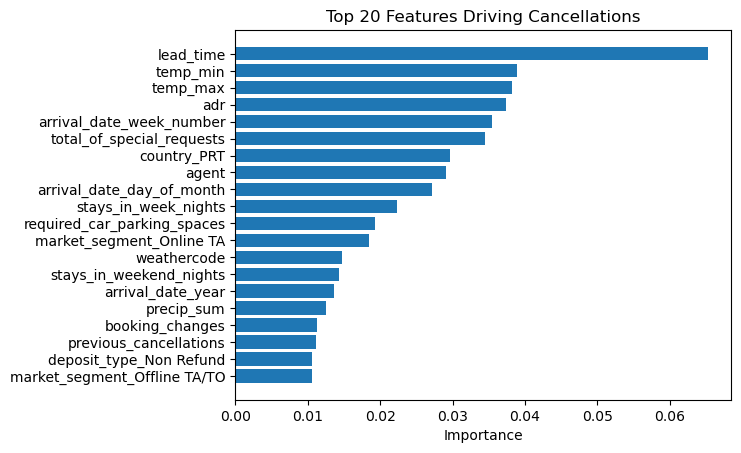

In [45]:
importances = Reservation_Cancellation_Prediction_Model.feature_importances_
feature_names = X_train.columns

fi = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure()
plt.barh(fi['Feature'], fi['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Features Driving Cancellations')
plt.xlabel('Importance')
plt.savefig('Top20Features', dpi=100, bbox_inches='tight')
plt.show()

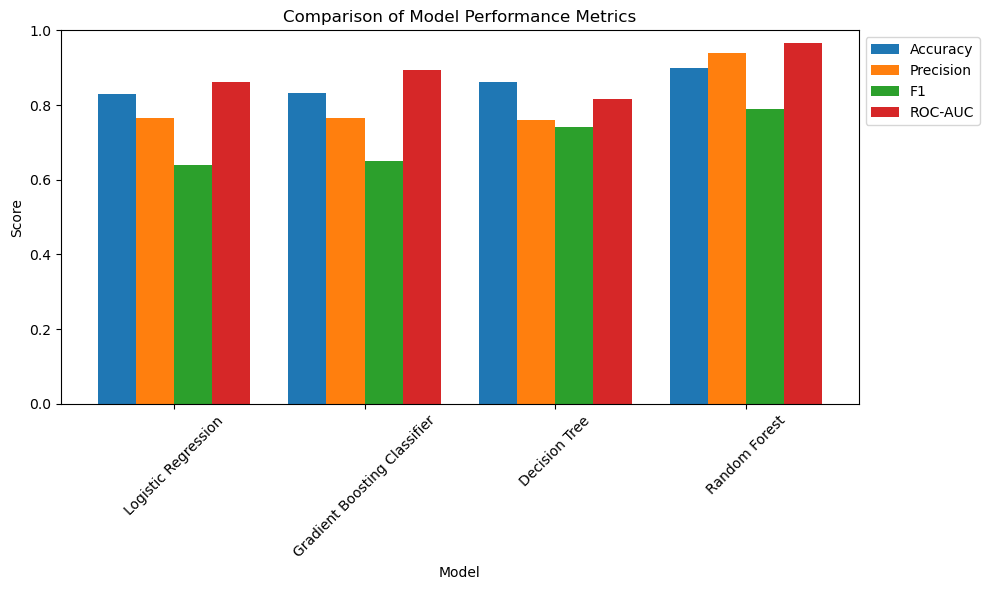

In [48]:
metrics = ["Accuracy", "Precision", "F1", "ROC-AUC"]
models = model_results["Model"]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, model_results[metric], width, label=metric)

ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance Metrics")
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylim(0, 1)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('ModelComparisonBarChart', dpi=100, bbox_inches='tight')
plt.show()